# EDA

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from scipy.stats import shapiro

In [14]:
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv("data/train.csv", sep=";")
df.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,12.3848,1.4019,0.3927,0.0438,16.6522,0.6806,1.1293,1.0491,5,3,8,1
1,9:45,1BLTE,22.0438,2.0016,0.5620,0.2697,10.3994,1.1771,1.4480,1.1630,6,5,11,1
2,7:45,9BLTE,0.5105,0.4258,0.0152,0.0106,0.2755,0.1685,1.0379,1.0535,1,2,3,1
3,2:45,4ALTE,1.9963,1.1513,0.9908,0.0245,64.7465,0.8747,1.0766,1.0526,3,2,5,1
4,3:30,10BLTE,0.3030,0.4040,0.0160,0.0130,0.3480,0.1680,1.0110,1.0110,2,1,3,0


In [16]:
df.shape

(36904, 14)

In [17]:
df_test = pd.read_csv("data/test.csv", sep=";")
df_test.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL
0,3:00,6ALTE,3.8177,1.5251,0.5829,0.0445,23.1688,0.7669,1.0262,0.0100,3,3,6
1,20:30,6ULTE,2.0210,3.3350,0.5690,0.0750,29.2650,1.0490,1.3140,0.0100,6,3,9
2,11:30,2ALTE,0.5050,0.4040,0.0140,0.0100,0.2270,0.0970,1.0110,0.0100,2,1,3
3,6:45,3CLTE,1.0110,0.5050,0.2380,0.0210,20.9620,0.6090,1.0110,1.0110,2,1,3
4,15:45,6CLTE,4.0269,0.5104,0.0807,0.0414,3.9317,1.7811,1.0575,0.0107,3,2,5


In [18]:
df_test.shape

(9158, 13)

In [19]:
PRBUsageUL = df.PRBUsageUL
PRBUsageDL = df.PRBUsageDL
CellName = df.CellName
meanThr_DL = df.meanThr_DL
meanThr_UL = df.meanThr_UL
maxThr_DL = df.maxThr_DL
meanUE_DL = df.meanUE_DL
meanUE_UL = df.meanUE_UL
maxUE_DL = df.maxUE_DL
maxUE_UL = df.maxUE_UL
maxUE_ULDL = df['maxUE_UL+DL']
Unusual = df.Unusual
#Convert time into a h:m format
Time = pd.to_datetime(df.Time, format = '%H:%M')

In [20]:
#obtaining unique cells
Cells = []

for i in df.CellName:
    if i not in Cells:
        Cells = np.append(Cells, i)

In [21]:
#Creating the 'Unusual' variable for each cell (whether a sample is anomalous or not)

for i in Cells:
    globals()[f"{i}_Unusual"] = []
    for j in range(len(Time)):
        if CellName[j] == i:
            globals()[f"{i}_Unusual"] = np.append(globals()[f"{i}_Unusual"],Unusual[j])

In [22]:
#Splitting variables into variables with anomalous and normal behaviour
variables = ["PRBUsageUL", "PRBUsageDL","Time","CellName","meanThr_DL","meanThr_UL","maxThr_DL","meanUE_DL","meanUE_UL","maxUE_DL","maxUE_UL","maxUE_ULDL"]

for i in variables:
    globals()[f"anomalous_{i}"] = []
    globals()[f"normal_{i}"] = []
    
for i in range(len(df.Time)):
    for j in variables:
        if df.Unusual[i] == 1:
            globals()[f"anomalous_{j}"] = np.append(globals()[f"anomalous_{j}"],globals()[j][i])
        else:
            globals()[f"normal_{j}"] = np.append(globals()[f"normal_{j}"],globals()[j][i])

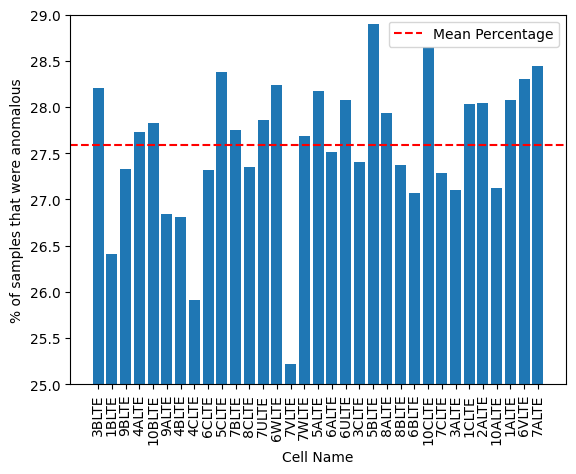

In [23]:
#Graph of percentage of abnormal behaviour for each cell, conclusion just from visualising it is that there doesnt appear to be that much deviation in each cell in terms of how many times there are anomalous samples
Percentages = []
for i in Cells:
    Percentages = np.append(Percentages, np.sum(globals()[f"{i}_Unusual"])/len(globals()[f"{i}_Unusual"])*100)
    
plt.bar(Cells,Percentages)
plt.ylim(25,29)
plt.xlabel("Cell Name")
plt.ylabel("% of samples that were anomalous")
plt.axhline(np.mean(Percentages),label = 'Mean Percentage', linestyle = '--', color = 'red')
plt.xticks(rotation = 90) 
plt.legend()
plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


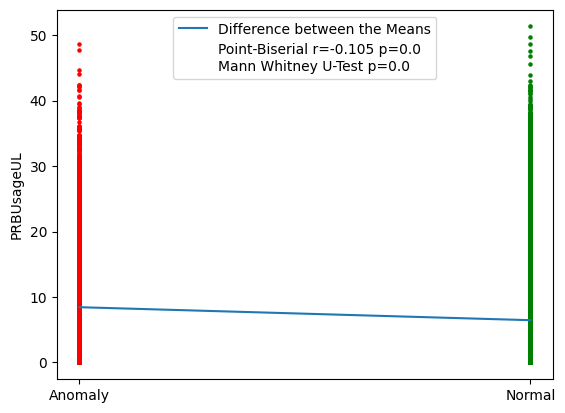

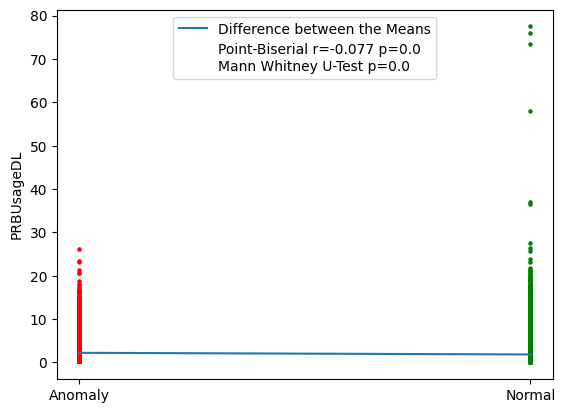

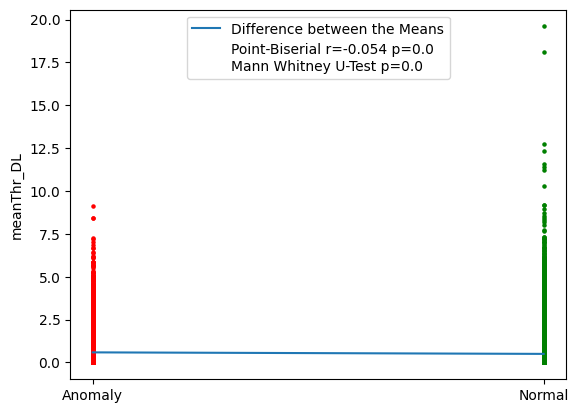

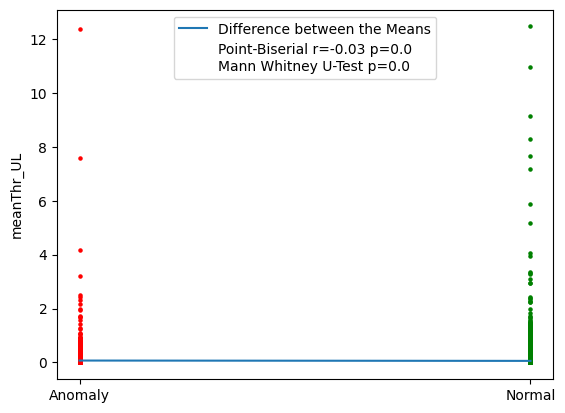

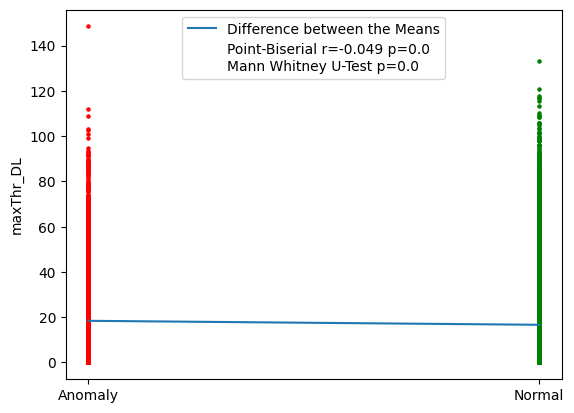

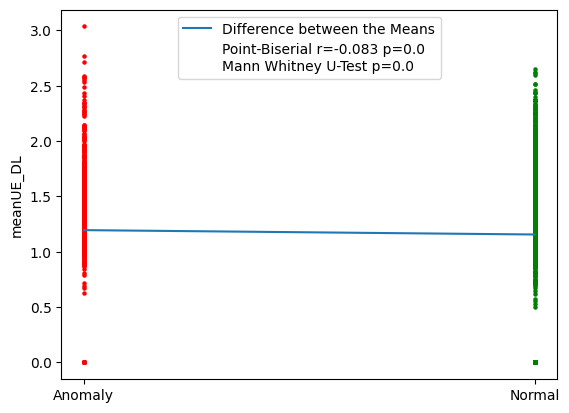

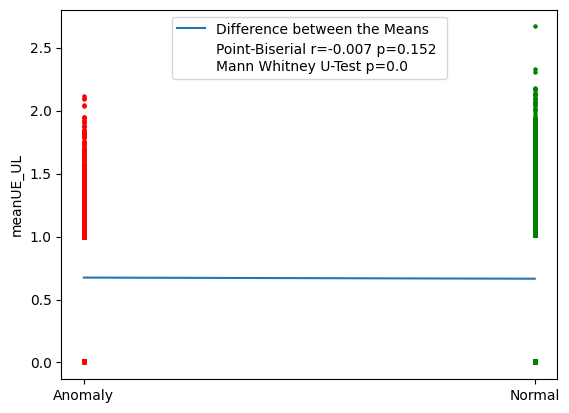

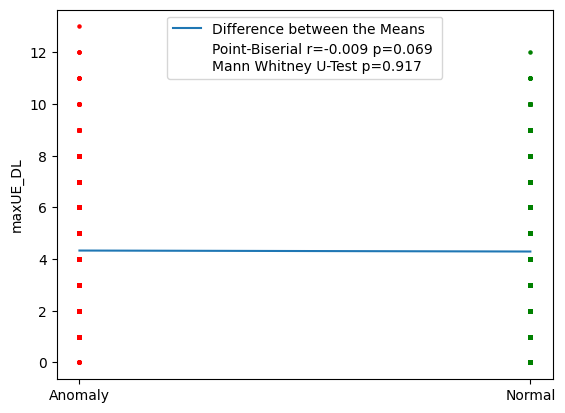

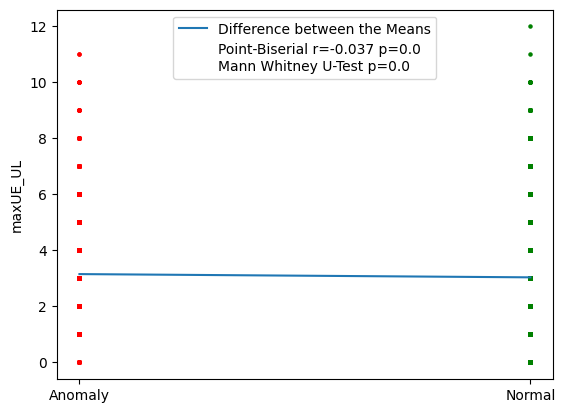

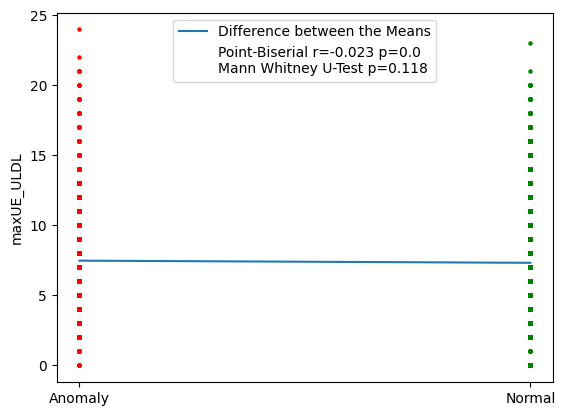

In [24]:
#Determining if there is a statistically significant difference in the values of variables when anomalous and when normal
variables_of_interest = variables[:2]+variables[4:] #variables of interest here are all variables except time and cell name 

for i in variables_of_interest:
    coeff, p_value = stats.pointbiserialr(Unusual,globals()[f"{i}"]) # Point biserial correlation for binary variable
    plt.scatter(["Anomaly"] * len(globals()[f"anomalous_{i}"]), globals()[f"anomalous_{i}"], s = 5, color = 'red')
    plt.scatter(["Normal"] * len(globals()[f"normal_{i}"]), globals()[f"normal_{i}"], s = 5, color = 'green')

    #Normality test to determine whether mann whitney u test or t test should be used, just so happens that everything here is not normally distributed
    if shapiro(globals()[f"{i}"])[1] < 0.05: #Level of significance (a-value) is 0.05
        Test_Type = 'Mann Whitney U-Test'
        statistic, p_value2 = stats.mannwhitneyu(globals()[f"anomalous_{i}"], globals()[f"normal_{i}"])
    else:
        Test_Type = 'T-Test (independent)'
        statistic, p_value2 = stats.ttest_ind(globals()[f"anomalous_{i}"], globals()[f"normal_{i}"])
        
    plt.plot([0,1],[np.mean(globals()[f"normal_{i}"]),np.mean(globals()[f"anomalous_{i}"])],label = f'Difference between the Means')
    plt.ylabel(i)
    plt.axhline(0,alpha = 0, label = f"Point-Biserial r={round(coeff,3)} p={round(p_value,3)} \n{Test_Type} p={round(p_value2,3)}")
    plt.legend(loc = 'upper center')
    plt.show()